In [7]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [3]:
ads = xr.open_zarr("/pscratch/sd/t/timothys/nested-eagle/0.25deg-06km/baselines/aorc/aorc.zarr")
hds = xr.concat(
    [
        xr.open_zarr(f"/pscratch/sd/t/timothys/nested-eagle/0.25deg-06km/baselines/hrrr-forecasts-vs-aorc/hrrr.forecasts.{fhr}.zarr")
        for fhr in ["06h", "12h", "24h", "48h"]
    ],
    dim="fhr",
)

In [4]:
gds = xr.open_zarr("/pscratch/sd/t/timothys/nested-eagle/0.25deg-06km/baselines/gfs-forecasts-vs-aorc/gfs.forecasts.zarr/")

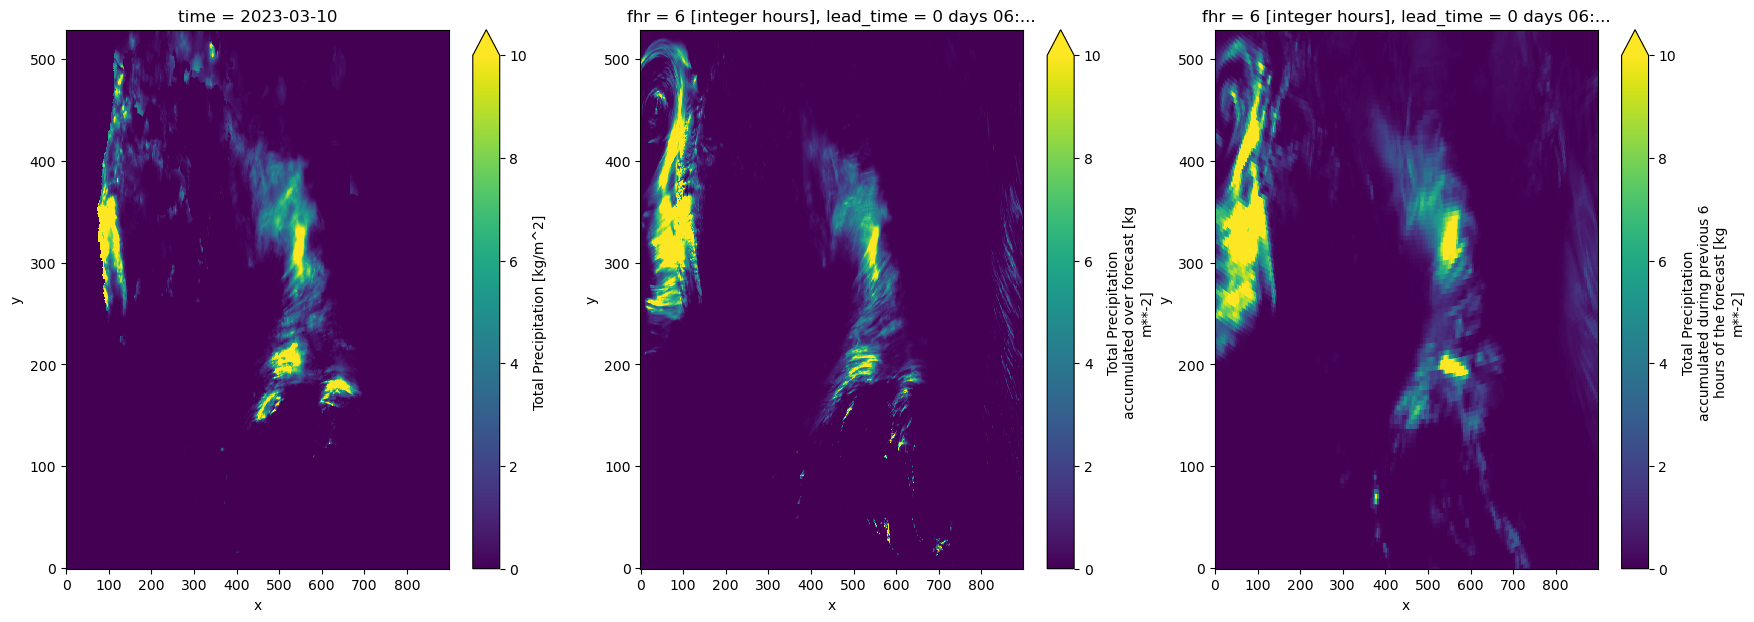

In [11]:
vtime = "2023-03-10T00"
fhr = 6
itime = pd.Timestamp(vtime) - pd.Timedelta(hours=fhr)
vmax = 10
fig, axs = plt.subplots(1, 3, figsize=(21,7))

for xds, ax in zip([ads, hds, gds], axs):
    if "fhr" in xds.dims:
        plotme = xds["accum_tp"].sel(t0=itime, fhr=fhr)
    else:
        plotme = xds["accum_tp"].sel(time=vtime)
    plotme.plot(ax=ax, vmax=vmax, vmin=0)